## Supplementary Materials 2: Representation of discrete symbolic structures

In Part 2, we explain how a GSC model represents *discrete* symbolic structures in its *continuous* representation space $\mathbb{R}^n$ where $n$ is the number of computing units. The following topics will be covered rather informally with a simple example grammar.

 1. Tensor-product variable binding
 2. Superposition of filler/role bindings
 3. Superposition of complete structures
 
For more formal explanation, see Smolensky (1990).

* Smolensky, P. (1990). Tensor product variable binding and the representation of symbolic structures in connectionist systems. *Artificial Intelligence, 46*(1), 159–216. http://doi.org/10.1016/0004-3702(90)90007-M

In [1]:
%matplotlib inline
import gsc
import matplotlib.pyplot as plt
import numpy as np

### Example grammar

Consider a grammar G = {S $\rightarrow$ A B | X Y}. We implement it in a GSC model as follows.

In [2]:
gram = 'S -> A B | X Y'
hg1 = gsc.HarmonicGrammar(cfg=gram, size=2, role_type='span_role', unary_base='filler')
net = gsc.GscNet(hg=hg1, seed=200)

### Representation of fillers and roles

When it constructs a GscNet object, the software generates distributed (or 'neural') representations of fillers and roles and stores them in the attributes F and R, respectively. 

In [3]:
print('Names of roles:', net.role_names)
print('Neural encodings of roles (each column corresponds to a role):')
print(net.R)  # both F and R are 2D NumPy arrays.

Names of roles: ['(0,1)', '(1,2)', '(0,1,2)', '(0,2)']
Neural encodings of roles (each column corresponds to a role):
[[ 0.91064719 -0.2548479   0.0698767  -0.31763285]
 [ 0.35872546  0.34068772 -0.60746792  0.6214745 ]
 [ 0.11611229 -0.29760744  0.62781273  0.70978776]
 [ 0.1689827   0.85464221  0.48161295 -0.09528981]]


The representation of each of the four roles is distributed across four units. In the default setting, each activation vector is orthogonal to every other activation vector and has a length of 1. Users can specify pairwise role similarities in dot products but we will not cover the topic in this tutorial.

In [4]:
# By default, the role activation vectors are orthogonal; dot product = 0
print('Vec len of role (0,1):', np.sqrt(net.R[:,0].dot(net.R[:,0])))
print('Dot product of roles (0,1) and (1,2):', net.R[:, 0].dot(net.R[:, 1]))

Vec len of role (0,1): 0.999999739599
Dot product of roles (0,1) and (1,2): 6.96966087288e-07


Encodings of fillers are presented below in columns of a heatmap.

Names of fillers: ['A', 'B', 'S', 'S[1]', 'S[2]', 'X', 'Y', '_']
Neural encodings of fillers (each column shows a neural encoding of a filler across 8 [= number of fillers] units):


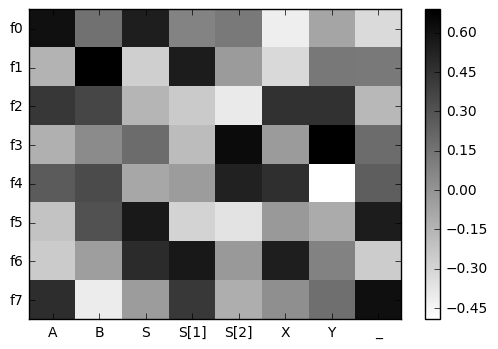

In [5]:
print('Names of fillers:', net.filler_names)
print(("Neural encodings of fillers (each column shows a neural encoding of a filler "
       "across %d [= number of fillers] units):" % 
       net.dim_f))
gsc.heatmap(net.F, xticklabels=net.filler_names, 
            yticklabels=['f' + str(ii) for ii in range(net.dim_f)], 
            grayscale=True)

### Tensor-product variable binding

Let $\texttt{f/r}$ ($\texttt{f} \in \texttt{F}$ and $\texttt{r} \in \texttt{R}$) be a binding of filler $\texttt{f}$ with role $\texttt{r}$ where $\texttt{F}$ and $\texttt{R}$ are the sets of fillers and roles, respectively. Let $\textbf{f}$ and $\textbf{r}$ be the activation vectors of filler $\texttt{f}$ and role $\texttt{r}$, respectively. Then, the neural encoding of $\texttt{f/r}$ is simply the tensor product ($\mathbf{f} \otimes \mathbf{r}$) of $\textbf{f}$ and $\textbf{r}$ where $(\mathbf{f} \otimes \mathbf{r})_{i,j} = \mathbf{f}_i \mathbf{r}_j$. 

In a simple case, the tensor product is simply an outer product of two vectors, one representing a filler and one representing a role. The figure below shows the neural representations of a filler $\texttt{A}$ in the left column, a role $\texttt{(0,1)}$ in the top row, and the binding $\texttt{A/(0,1)}$ in the other units arranged in a matrix form. The units with two circles have negative activation values. The color of each unit represents the absolute activation value; the more black it is, the greater the absolute activation is.

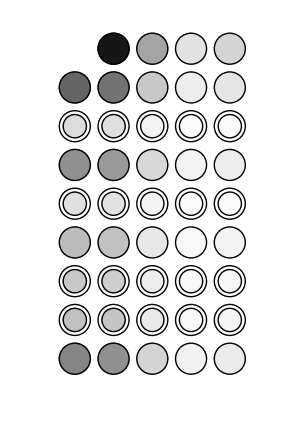

In [6]:
act_A  = net.F[:, net.filler_names.index('A')]     # activation pattern of filler A
act_01 = net.R[:, net.role_names.index('(0,1)')]   # activation pattern of role (0,1)
# tensor product is a generalization of outer product.
act_A01 = np.outer(act_A, act_01)
# act_A01 = np.tensordot(act_A, act_01, axes=0)  # same result

#print(act_A01)
gsc.plot_TP(act_A, act_01, figsize=(3,10))

The resulting matrix (or 2D array) is flattened into a vector (or 1D array). The two-element indices of the tensor product are ordered as follows: (0,0), (1,0), ..., (I-1,0), ..., (i,j), ..., (0,J-1), (1,1), ..., (I-1,J-1) where I and J are the number of units representing fillers and the number of units representing roles, respectively. By default, the numbers are set to the number of fillers and roles. 

The software computes the neural representations of all possible bindings and stores them in the attribute TP. The attribute contains a 2D array in which each column corresponds to an activation pattern representing a unique f/r binding.

In [7]:
# reshape the result into a 1d NumPy array.
act_A01 = act_A01.reshape((net.num_units, ), order='F')  # pay attention to order

# compare the activation vector for A/(0,1) that we manually computed with the vector constructed by the software.
np.allclose(act_A01, net.TP[:, net.binding_names.index('A/(0,1)')])

True

The heatmap below shows the activation patterns of f/r bindings in columns.

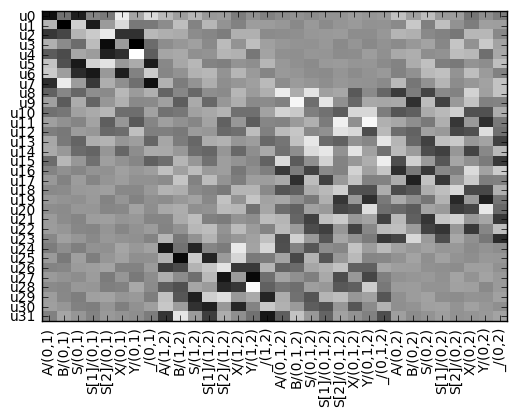

In [8]:
gsc.heatmap(net.TP, xticklabels=net.binding_names, rotate_xticklabels=90,
            yticklabels=['u' + str(ii) for ii in range(net.num_units)], grayscale=True, colorbar=False)

### Conceptual and neural spaces

Each column of the TP matrix is an activation pattern representing a f/r binding in the *neural* space. In Figure 1a, the basis of the neural space is shown in blue and the activation patterns of bindings in the neural space are shown in green. An activation pattern (e.g., the red vector in Figure 1a) in *neural coordinates* is hard to interpret. Thus, we introduce a new coordinate system in which the set of binding vectors constitutes a basis of the new representation space, which we call the *conceptual* space (see Figure 1b). 

<center><img src="https://drive.google.com/uc?export=view&id=0B_00NTv-ntI_WmQ1WHV2V29GaFE" style="height: 220px;">
Figure 1. Neural and conceptual coordinate systems</center>

The basis of the conceptual space is simply the identity matrix $\mathbf{I}$ whose columns correspond to unique f/r bindings. Because $\mathbf{TP} = \mathbf{TP} \cdot \mathbf{I}$, the set of neural encodings of f/r bindings, $\mathbf{TP}$ can be thought of as a change-of-basis matrix $\mathbf{N}$. The change-of-basis matrix for the opposite conversion is $\mathbf{C} = \mathbf{TP}^{-1}$. 

With the change-of-basis matrix, we can easily convert an activation pattern in the neural space to an equivalent one in the conceptual space, which is much easier to interpret: $\mathbf{c} = \mathbf{TP}^{-1} \cdot \mathbf{n}$. The code block below randomly samples a filler and a role and then presents the representation of their binding in the neural space first and in the conceptual space second. 

For an exposition of this idea, see:

* Smolensky, P. (1986). Neural and conceptual interpretations of parallel distributed processing models. In J. L. McClelland, D. E. Rumelhart, and the PDP Research Group, *Parallel distributed processing: Explorations in the microstructure of cognition. Vol. 2, Psychological and biological models*, pp. 390-431. MIT Press.

Sampled filler  : B
Sampled role    : (0,2)

Sampled binding : B/(0,2)

Neural coordinates


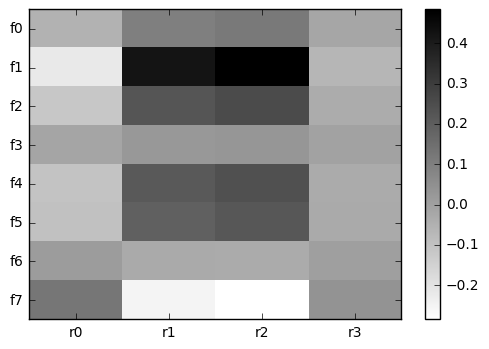

Conceptual coordinates


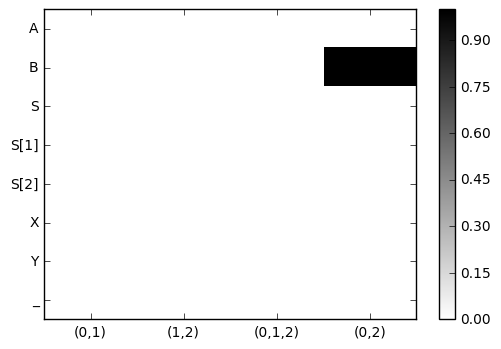

In [9]:
# Sample a filler and a role randomly and find the binding of the chosen filler and role.
idx_filler  = np.random.randint(net.num_fillers)
idx_role    = np.random.randint(net.num_roles)
idx_binding = idx_filler + net.num_fillers * idx_role

# Sample the neural encodings of the chosen symbols.
act_filler  = net.F[:, idx_filler]
act_role    = net.R[:, idx_role]
act_binding = net.TP[:, idx_binding]
# the TP attribute contains a change-of-basis matrix from conceptual to neural space

# neural encoding of the binding
act_mat = act_binding.reshape((net.dim_f, net.dim_r), order='F')
xticklabels = ['r' + str(ii) for ii in range(net.dim_r)]
yticklabels = ['f' + str(ii) for ii in range(net.dim_f)]

print('Sampled filler  :', net.filler_names[idx_filler])
print('Sampled role    :', net.role_names[idx_role])
print('')
print('Sampled binding :', net.binding_names[idx_binding])
print('')

print('Neural coordinates')
gsc.heatmap(act_mat, xticklabels=xticklabels, yticklabels=yticklabels, grayscale=True)

print('Conceptual coordinates')
actC_binding = net.N2C(act_binding)  # Change of basis. from N(eural coordinates) to C(onceptual coordinates)
actC_mat = actC_binding.reshape((net.num_fillers, net.num_roles), order='F')
# More conveniently: net.vec2mat(actC_binding)
gsc.heatmap(actC_mat, xticklabels=net.role_names, yticklabels=net.filler_names, grayscale=True)

For interpretability, the software will typically present the static activation patterns in conceptual coordinates in a matrix form as in the second figure above. 

Neural coordinates in a vector form


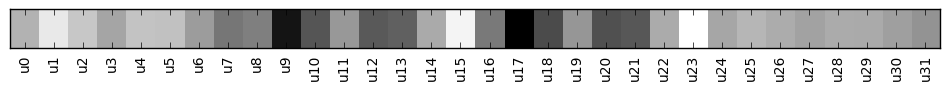

Conceptual coordinates in a vector form


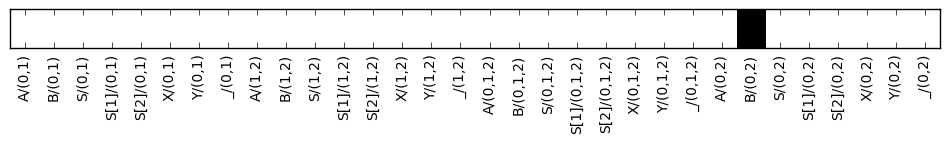

In [10]:
# vector representation
print('Neural coordinates in a vector form')
plt.figure(figsize=(12, 0.5))
gsc.heatmap(act_binding.reshape(1, net.num_units), 
            xticklabels=['u'+str(ii) for ii in range(net.num_units)], 
            rotate_xticklabels=True, grayscale=True, ytick=False, colorbar=False)

print('Conceptual coordinates in a vector form')
plt.figure(figsize=(12, 0.5))
gsc.heatmap(actC_binding.reshape(1, net.num_bindings), 
            xticklabels=net.binding_names, rotate_xticklabels=True, grayscale=True, ytick=False, colorbar=False)

## Superposition of f/r bindings

So far we have learned (1) any symbolic structure can be described as a set of f/r bindings by role decomposition (Part 1) and (2) each f/r binding can be represented as a tensor product of the filler and role activation vectors in a continuous vector space. In this section, we introduce the third element of the theory of neural representation of symbolic structures: (3) the composition of multiple f/r bindings is represented as the superposition (simply, sum) of the activation vectors of constituent f/r bindings. 

For example, consider T1=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]]. The neural encoding of T1 is simply the superposition of the neural encodings of the constituent bindings: $\mathbf{a}^{(\texttt{T1})} = \mathbf{a}^{(\texttt{A/(0,1)})} + \mathbf{a}^{(\texttt{B/(1,2)})} + \mathbf{a}^{(\texttt{S[1]/(0,1,2)})} + \mathbf{a}^{(\texttt{S/(0,2)})}$ where $\mathbf{a}^{(\cdot)}$ is an activation vector (in either neural or conceptual coordinates) representing a binding or a tree.

Activation patterns in neural coordinates


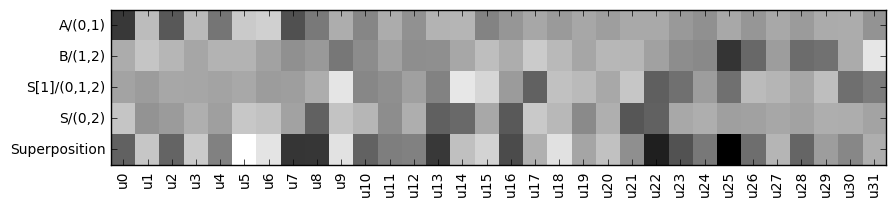

After change-of-basis, we get: 
Activation patterns in conceptual coordinates


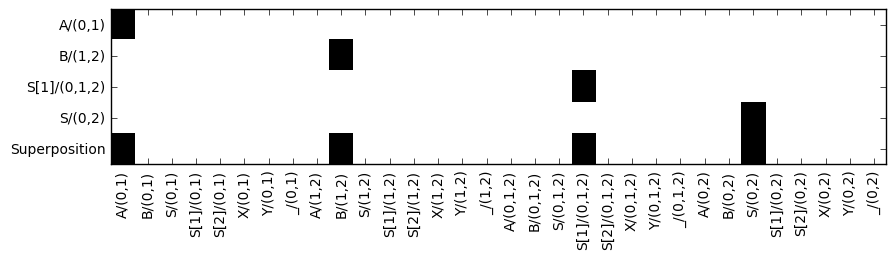

In [11]:
T1 = ['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)']  # A grammatical structure

act_list = []
for binding in T1:
    net.set_state(binding, 1.0)     # set the activation value(s) of a (set of) binding(s) to a particular value.
    act_list.append(net.act)

act_list = np.array(act_list)       # each row of the 2D array corresponds to an encoding of a f/r binding
act_sum = np.sum(act_list, axis=0)  # the superposition of constituents

act_list = np.vstack((act_list, act_sum))  # Add the superposition to the bottom

# vector representation
print('Activation patterns in neural coordinates')
plt.figure(figsize=(10, 2))
gsc.heatmap(act_list, 
            xticklabels=['u'+str(ii) for ii in range(net.num_units)], 
            yticklabels=['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)', 'Superposition'],
            rotate_xticklabels=True, grayscale=True, colorbar=False)

# Change of basis
actC_list = net.N2C(act_list.T).T

print('After change-of-basis, we get: ')
print('Activation patterns in conceptual coordinates')
plt.figure(figsize=(10, 2))
gsc.heatmap(actC_list, 
            xticklabels=net.binding_names, 
            yticklabels=['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)', 'Superposition'],
            rotate_xticklabels=True, grayscale=True, colorbar=False)

The heatmap at the top presents the activation patterns of four constituent f/r bindings as well as their sum (labeled as 'Superposition') in the neural space. Then, we changed the basis to read the coordinates of the activation vectors in the conceptual space and plotted them in a heatmap at the bottom. It is clear that the sum of the first four rows equals the activation pattern of T1 in conceptual coordinates.

The superposition of the distributed representations of constituent bindings is not catastrophic, if the encodings of fillers and roles each are linearly independent; it naturally follows the tensor-products of fillers with roles are also linearly independent. The GSC model does not have any difficulty in representing a single discrete symbolic structure in the neural space.

## Superposition of complete structures

The ability to represent a single discrete symbolic structure is not enough for an incremental processing model. Given local ambiguity, any incremental processing model must be able to consider multiple structures simultaneously as candidate interpretations in the middle of comprehension.

Consider two grammatical structures $\texttt{T1}$=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A B]]] and $\texttt{T2}$=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [X Y]]] generated by a simple grammar G. An intuitive way of representing the co-presence of both structures is to compute a weighted average of neural encodings of T1 and T2. For example, consider an activation vector $\mathbf{a} = 0.5 \mathbf{a}^{(\texttt{T1})} + 0.5 \mathbf{a}^{(\texttt{T2})}$, where $\mathbf{a}^{(\texttt{T}_\mathrm{k})}$ is an activation vector representing a discrete structure $\texttt{T}_\mathrm{k}$. The problem with this scheme is that it is not clear which bindings goes with which other bindings. To see the problem, consider two ungrammatical structures $\texttt{T3}$=[$_\mathrm{S}$ [$_\mathrm{S[1]}$ [A Y]]] and $\texttt{T4}$=[$_\mathrm{S}$ [$_\mathrm{S[2]}$ [X B]]]. We now verify that an equally-weighted sum of $\mathbf{a}^{(\texttt{T1})}$ and $\mathbf{a}^{(\texttt{T2})}$ will produce the same vector $\mathbf{a}$ as an equally-weighted sum of $\mathbf{a}^{(\texttt{T3})}$ and $\mathbf{a}^{(\texttt{T4})}$:
$\mathbf{a} = 0.5 \mathbf{a}^{(\texttt{T1})} + 0.5 \mathbf{a}^{(\texttt{T2})} = 0.5 \mathbf{a}^{(\texttt{T3})} + 0.5 \mathbf{a}^{(\texttt{T4})}$: 

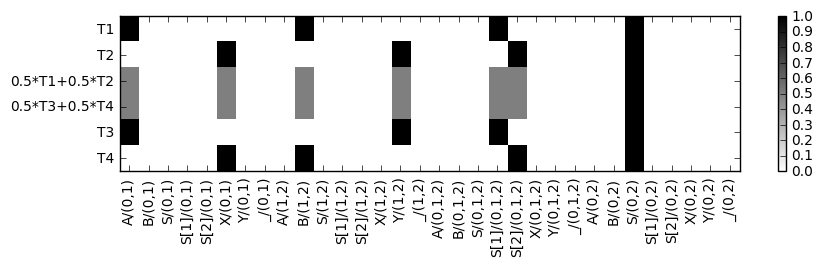

In [12]:
T1 = ['A/(0,1)', 'B/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)']
net.set_state(T1, 1.0)
actC1 = net.actC.copy()

T2 = ['X/(0,1)', 'Y/(1,2)', 'S[2]/(0,1,2)', 'S/(0,2)']
net.set_state(T2, 1.0)
actC2 = net.actC.copy()

T3 = ['A/(0,1)', 'Y/(1,2)', 'S[1]/(0,1,2)', 'S/(0,2)']
net.set_state(T3, 1.0)
actC3 = net.actC.copy()

T4 = ['X/(0,1)', 'B/(1,2)', 'S[2]/(0,1,2)', 'S/(0,2)']
net.set_state(T4, 1.0)
actC4 = net.actC.copy()

# Create two blend patterns: a blend of two grammatical structures and a blend of two ungrammatical structures
blend1 = 0.5 * actC1 + 0.5 * actC2  # blend of T1 and T2: 0.5*T1 + 0.5*T2
blend2 = 0.5 * actC3 + 0.5 * actC4  # blend of T3 and T4: 0.5*T3 + 0.5*T4

actC_all = np.array([actC1, actC2, blend1, blend2, actC3, actC4])  # Pay attention to the order.

plt.figure(figsize=(10, 2))
gsc.heatmap(actC_all, yticklabels=['T1', 'T2', '0.5*T1+0.5*T2', '0.5*T3+0.5*T4', 'T3', 'T4'], 
            xticklabels=net.binding_names, grayscale=True, rotate_xticklabels=True)

An equally-weighted blend of T1 and T2, $\mathbf{a}$, is identical with a corresponding blend of T3 and T4. This kind of phenomenon has been dubbed the *superposition catastrophe* (Von der Malsburg, 1986) and has been claimed to be a weakness of distributed representation. It appears problematic because in the middle of language comprehension, a system must be able to consider multiple interpretations.

Although the GSC model monitors only local and not global coherence, we will next see that its *dynamics* can unblend the blend $\mathbf{a}$ correctly to build either T1 or T2 but neither T3 nor T4. Because the harmonic grammar of G specifies that a pair of bindings $\texttt{A/(0,1)}$ and $\texttt{S[1]/(0,1,2)}$ is well-formed (by binary HG rules), the model tries to coactivate these bindings. Likewise, $\texttt{B/(1,2)}$ and $\texttt{S[1]/(0,1,2)}$ support each other. Thus, whenever $\texttt{A/(0,1)}$ is activated, $\texttt{S[1]/(0,1,2)}$ and $\texttt{B/(1,2)}$ are also likely to be activated. In the current example, $\texttt{Y/(1,2)}$ goes well with $\texttt{S[2]/(0,1,2)}$, which will compete with $\texttt{S[1]/(0,1,2)}$ in role $\texttt{(0,1,2)}$. Thus, there is a tension between a group of bindings in T1 and another group of bindings in T2 in the blend state $\mathbf{a}$. As the model will ultimately be forced to choose one filler in each role (e.g., $\texttt{S[1]/(0,1,2)}$ vs. $\texttt{S[2]/(0,1,2)}$), symmetry breaking will occur and either T1 or T2 will be chosen. We will discuss this dynamic process in Part 3. 

* Von Der Malsburg, C. (1986). Am I thinking assemblies? In G. Palm & A. Aertsen (Eds.), *Brain Theory (pp. 161–176)*. Springer Berlin Heidelberg.